In [ ]:
#1. Data Exploration and Preprocessing
#Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
#Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
#Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/blogs.csv.xls")

# Display the first few rows of the dataset
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Missing values:
 Data      0
Labels    0
dtype: int64
Unique Categories: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
Category Counts:
 Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sc

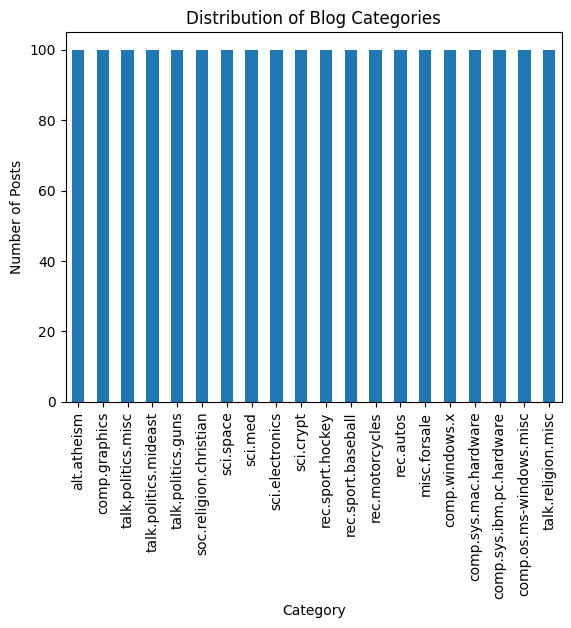

In [9]:
# Get dataset information
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Display unique categories
unique_categories = data['Labels'].unique()
print("Unique Categories:", unique_categories)

# Count the number of posts in each category
category_counts = data['Labels'].value_counts()
print("Category Counts:\n", category_counts)

# Visualize the distribution of categories (optional, requires matplotlib)
import matplotlib.pyplot as plt

category_counts.plot(kind='bar')
plt.title('Distribution of Blog Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.show()

In [10]:
import string
from nltk.corpus import stopwords

# Download NLTK stopwords (if not downloaded)
import nltk
nltk.download('stopwords')

# Get set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning to the Data column
data['Cleaned_Data'] = data['Data'].apply(clean_text)

# Display a sample of cleaned text
print(data[['Data', 'Cleaned_Data']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(data['Cleaned_Data']).toarray()

# Labels (y)
y = data['Labels']

# Display the shape of the feature matrix
print("Shape of TF-IDF features:", X.shape)

Shape of TF-IDF features: (2000, 5000)


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1600
Test set size: 400


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8225
Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0 15  1  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 19  0  0  1  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  2 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0 21  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0 14  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  1  1  0  1  0  0 10  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  1  0  0  0  0 17  0  1  0  0  0]
 [ 1  0  0  0  0  0

NameError: name 'np' is not defined

<Figure size 1000x700 with 0 Axes>

In [16]:
from textblob import TextBlob

# Function to categorize the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Determine sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the Data column
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Display a sample of the sentiment results
print(data[['Data', 'Sentiment']].head())


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


Sentiment Distribution:
 Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc            

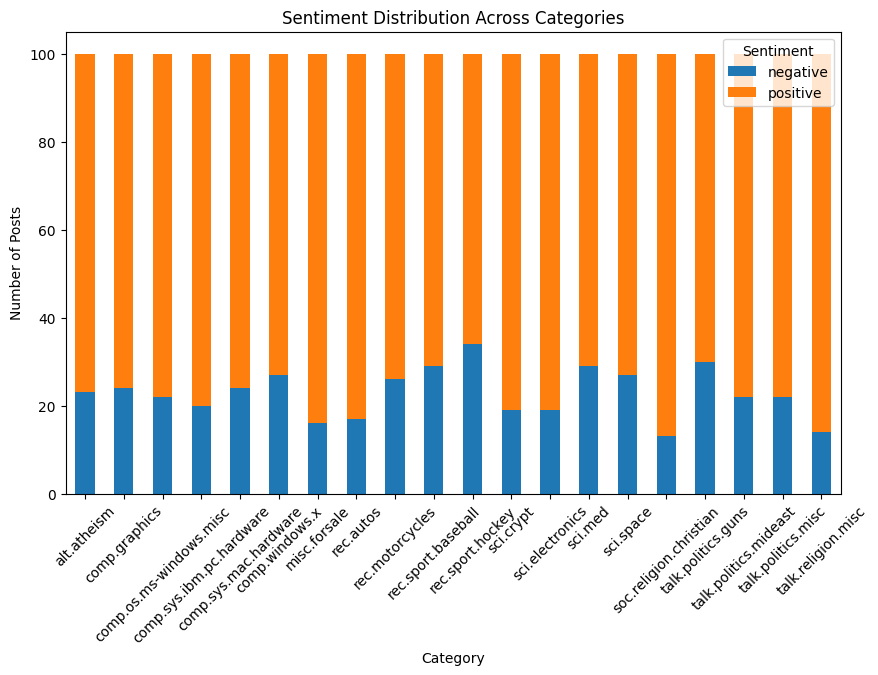

In [17]:
# Count the distribution of sentiments per category
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Display the sentiment distribution
print("Sentiment Distribution:\n", sentiment_distribution)

# Visualize the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Example summary
total_posts = data.shape[0]
positive_count = data[data['Sentiment'] == 'positive'].shape[0]
negative_count = data[data['Sentiment'] == 'negative'].shape[0]
neutral_count = data[data['Sentiment'] == 'neutral'].shape[0]

print("Total Posts:", total_posts)
print("Total Positive Sentiments:", positive_count)
print("Total Negative Sentiments:", negative_count)
print("Total Neutral Sentiments:", neutral_count)

# The sentiment distribution per category can also be summarized
print(sentiment_distribution)

Total Posts: 2000
Total Positive Sentiments: 1543
Total Negative Sentiments: 457
Total Neutral Sentiments: 0
Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22  

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8225
Precision: 0.8276
Recall: 0.8225
F1-Score: 0.8171
